In [1]:
import pandas as pd
import numpy as np

In [5]:
data = pd.read_csv('./reviews_token.csv')
data['label'] = 0

In [15]:
for i in range(len(data)):
    if data['star'].iloc[i] == 5 :
        data['label'].iloc[i] = 1
    elif data['star'].iloc[i] == 1 or data['star'].iloc[i] == 2 : #or data['star'].iloc[i] == 3 or data['star'].iloc[i] == 4
        data['label'].iloc[i] = 0

C:\Users\admin\AppData\Local\Temp\ipykernel_10852\979155014.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['label'].iloc[i] = 1
C:\Users\admin\AppData\Local\Temp\ipykernel_10852\979155014.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['label'].iloc[i] = 0


참고 : https://team-ak.tistory.com/2

In [9]:
def print_class_num(df, label_name):            # 이진 클래스의 비율을 알아보기 위한 함수
  n_total = len(df)                             # 데이터의 총 개수
  n_neg = len(df.query(label_name + ' == 0'))   # label로 사용하는 열의 1 개수
  n_pos = len(df.query(label_name + ' == 1'))   # label로 사용하는 열의 0 개수

  print("부정 댓글: {}개, {:.2f}%".format(n_neg, n_neg*100/n_total))
  print("긍정 댓글: {}개, {:.2f}%\n".format(n_pos, n_pos*100/n_total))

  values = df[label_name].value_counts()        # label로 사용하는 열의 값을 카운트 
  values.plot(kind='bar')
  print(values)

In [28]:
data2 = data[data['star']==1]
data2 = data2.append(data[data['star']==2])
data2 = data2.append(data[data['star']==5])
data2

C:\Users\admin\AppData\Local\Temp\ipykernel_10852\3876798870.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data2 = data2.append(data[data['star']==2])
C:\Users\admin\AppData\Local\Temp\ipykernel_10852\3876798870.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data2 = data2.append(data[data['star']==5])


,star,date,vendor,review,help,review_r,tokenized,label
32,1,2021.12.05,쿠팡(주),새로산 모니터에 쓰려고 구매했는데 끼고나서 분해되서 빼 새로산 모니터에 쓰려고 구매...,0,새로 산 모니터에 쓰려고 구매했는데 끼고 나서 분해돼서 빼 새로 산 모니터에 쓰려...,"['새로', '산', '모니터', '에', '쓰려고', '구매', '했는데', '끼...",0
38,1,2022.03.18,쿠팡(주),제가 구입한 케이블은 불량인가요아님 앞서 구매한 분들과는 다른 제품인가요 3시간 정...,1,제가 구입한 케이블은 불량인 가요 아니면 앞서 구매한 분들과는 다른 제품인가요 3...,"['제', '가', '구입', '한', '케이블', '은', '불량', '인', '...",0
49,1,2021.01.14,쿠팡(주),사용중에 갑자기 인식이 안되더니 그뒤로 작동을 안함,4,사용 중에 갑자기 인식이 안되더니 그 뒤로 작동을 안 함,"['사용', '중', '에', '갑자기', '인식', '이', '안되더니', '그'...",0
52,1,2020.10.20,쿠팡(주),사지마삼 쓰레기,0,사지 마감 쓰레기,"['사지', '마감', '쓰레기']",0
64,1,2020.11.07,쿠팡(주),개인적으로 별로에여,0,개인적으로 별로에 여,"['개인', '적', '으로', '별로', '에', '여']",0
...,...,...,...,...,...,...,...,...
144875,5,2021.10.12,주식회사 쓰리윈즈,너무 좋아용 잘 돌아가고 배송도 빨라요,0,너무 좋아요 잘 돌아가고 배송도 빨라요,"['너무', '좋아요', '잘', '돌아가고', '배송', '도', '빨라요']",1
144877,5,2022.08.18,쿠팡(주),게이밍 모니터를 찾던 와중 쿠팡체험단에 당첨되서 BattleG 686cm FHD 유...,3,게이밍 모니터를 찾던 와중 쿠팡 체험단에 당첨돼서 BattleG 686cm FHD ...,"['게이', '밍', '모니터', '를', '찾던', '와중', '쿠팡', '체험'...",1
144879,5,2021.04.07,쿠팡(주),처음 받을땐 불량이 왔지만 처음 받은 상품이 불량이라 기분이 상했지만 쿠팡의 빠른 ...,5,처음 받을 땐 불량이 왔지만 처음 받은 상품이 불량이라 기분이 상했지만 쿠팡의 빠른...,"['처음', '받을', '땐', '불량', '이', '왔지만', '처음', '받은'...",1
144880,5,2021.05.26,쿠팡(주),불량화소 없이 양품으로왔고 포장도 꼼꼼히왔습니다,1,불량화소 없이 양 품으로 왔고 포장도 꼼꼼히 왔습니다,"['불량화소', '없이', '양', '품', '으로', '왔고', '포장', '도'...",1


In [29]:
data2.reset_index(inplace=True)

부정 댓글: 13553개, 11.81%
긍정 댓글: 101203개, 88.19%

1    101203
0     13553
Name: label, dtype: int64


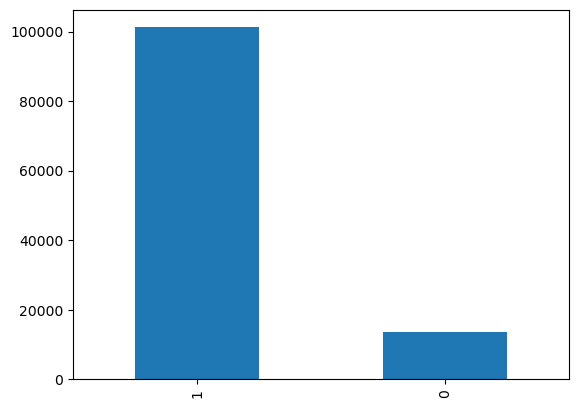

In [30]:
print_class_num(data2, 'label')

In [ ]:
from transformers import BertTokenizer

bert_tokenizer = BertTokenizer.from_pretrained("bert-base-uncased")

In [31]:
from kss import split_sentences

In [43]:
tokenized = pd.DataFrame(columns=['sents', 'label'])
tokenized


,sents,label


In [45]:
for sents, label in zip(data2['review_r'], data2['label']):
  for sent in split_sentences(sents):
#  tokenized.append(bert_tokenizer(sent))
    t = bert_tokenizer.encode_plus(sent,
                                  add_special_tokens=True,
                                  max_length=30,
                                  padding='max_length',
                                  return_attention_mask=True)
    tokenized = pd.concat([tokenized, pd.Series([t, label])])